In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from mlxtend.plotting import plot_decision_regions

In [2]:
df=pd.read_csv('ushape.csv')
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [3]:
df.rename(columns={'3.159499363321345566e-02':'X','9.869877579082642072e-01':'Y','0.000000000000000000e+00':'class'},inplace=True)

In [4]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


<Axes: xlabel='X', ylabel='Y'>

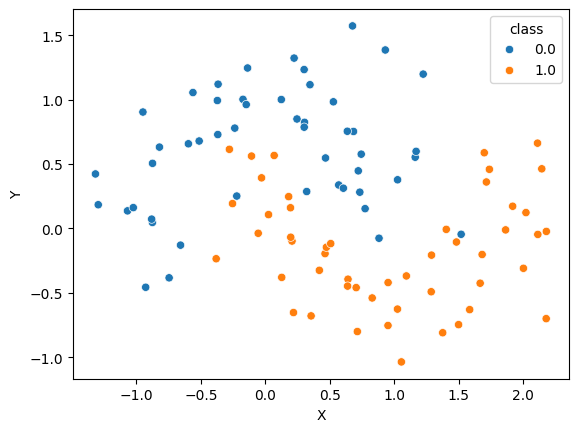

In [5]:
sns.scatterplot(x=df['X'],y=df['Y'],hue=df['class'])

In [15]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

GLOROT-NORMAL

In [17]:
model=Sequential()

model.add(Dense(10,input_dim=2,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.get_weights()

[array([[ 0.77244216,  0.1297217 , -0.00551099, -0.3480987 , -0.23249196,
         -0.6803866 ,  0.18284434, -0.5875591 , -0.78375006, -0.41276166],
        [ 0.07894839,  0.22706719, -0.261188  ,  0.41585657,  0.42229906,
          0.18806265, -0.43700433, -0.39646354, -0.572477  ,  0.29575524]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-3.6368829e-01, -2.4538749e-01, -1.1861687e-01, -4.0136907e-01,
         -2.4857956e-01,  2.5721440e-01,  3.8172907e-01, -4.2547134e-01,
          3.8416368e-01,  2.1226391e-01],
        [-3.9085090e-01,  4.6466136e-01, -2.0706396e-01, -4.8814344e-01,
         -3.9820790e-01, -2.0171942e-01,  1.6728050e-01,  3.9895511e-01,
          1.2218512e-01, -3.1355923e-01],
        [-3.6967322e-01, -1.5777652e-01,  1.2959352e-02,  1.6290379e-01,
          5.6956619e-01, -4.9525768e-01,  9.8780938e-04,  6.6842979e-01,
         -1.3602930e-01,  5.5882478e-01],
        [ 2.9804417e-01, -4.3799445e-01,  2.12133

In [19]:
ini_weight=model.get_weights()

In [21]:
ini_weight[0]=np.random.randn(2,10)*np.sqrt(1/2)
ini_weight[1]=np.zeros(model.get_weights()[1].shape)
ini_weight[2]=np.random.randn(10,10)*np.sqrt(1/2)
ini_weight[3]=np.zeros(model.get_weights()[3].shape)
ini_weight[4]=np.random.randn(10,10)*np.sqrt(1/2)
ini_weight[5]=np.zeros(model.get_weights()[5].shape)
ini_weight[6]=np.random.randn(10,10)*np.sqrt(1/2)
ini_weight[7]=np.zeros(model.get_weights()[7].shape)
ini_weight[8]=np.random.randn(10,1)*np.sqrt(1/2)
ini_weight[9]=np.zeros(model.get_weights()[9].shape)

In [22]:
model.set_weights(ini_weight)

In [23]:
model.get_weights()

[array([[ 1.160709  ,  0.37201506, -1.6755414 ,  1.3364861 ,  0.03866322,
         -0.58316714, -0.67118055,  0.44430748,  0.9391648 ,  0.66833526],
        [ 0.3048071 , -0.54497504, -0.16253991, -0.07420593,  0.31382817,
          0.8446759 ,  0.08161522, -0.17802465,  0.29955068,  0.6752249 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.00805691,  0.54675025,  0.215146  , -0.0668711 , -1.2918705 ,
          0.31449673,  0.7707559 ,  0.47528443, -0.12713179, -0.3650852 ],
        [-0.33148724, -0.8738341 ,  0.6364448 , -0.15777594, -0.8670592 ,
         -0.388173  ,  0.4696843 , -0.52289903, -0.5867958 , -0.08551904],
        [-0.5735155 , -0.12738293, -0.4259436 , -0.56306905, -0.28510168,
         -0.58842397,  0.6854059 ,  1.0131221 ,  0.31062523, -0.04257281],
        [-0.71037614,  0.39231998,  0.7652194 , -0.71084654,  0.08475301,
          0.672062  , -0.56357515,  0.7745815 ,  0.6083197 ,  1.8562851 ],
        [ 1.16056

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 0.7045 - loss: 0.5465 - val_accuracy: 0.8500 - val_loss: 0.3617
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7523 - loss: 0.4816 - val_accuracy: 0.8500 - val_loss: 0.3538
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7767 - loss: 0.4669 - val_accuracy: 0.8500 - val_loss: 0.3513
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7923 - loss: 0.4442 - val_accuracy: 0.8500 - val_loss: 0.3496
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7908 - loss: 0.4376 - val_accuracy: 0.8500 - val_loss: 0.3480
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7894 - loss: 0.4566 - val_accuracy: 0.8500 - val_loss: 0.3449
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8098 - loss: 0.4442 - val_accuracy: 0.9000 - val_loss: 0.3385
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8215 - loss: 0.4225 - val_accuracy: 0.9000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

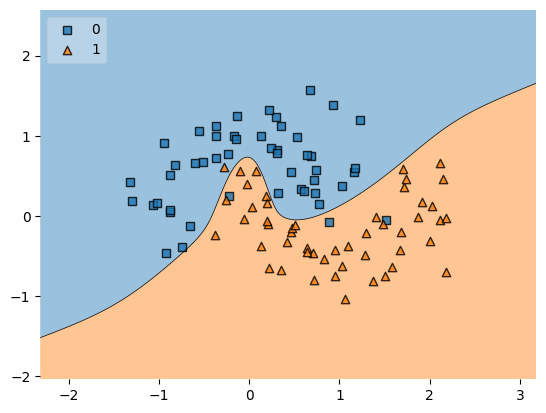

In [27]:
plt.figure()
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)

GLOROT-UNIFORM

In [44]:
model=Sequential()

model.add(Dense(10,input_dim=2,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.get_weights()

[array([[ 0.21421218,  0.09779841, -0.40786988, -0.5552523 , -0.31628713,
         -0.04797322, -0.31903106, -0.62787324, -0.35330808,  0.42808455],
        [-0.38220415, -0.5175326 ,  0.084512  ,  0.18069297, -0.0326336 ,
          0.14453232,  0.03071225, -0.24535432,  0.3646068 ,  0.33598477]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.30032843, -0.00168484,  0.26489258,  0.32266682, -0.04755872,
          0.3412665 , -0.30384475, -0.42831126,  0.14957005, -0.19213614],
        [ 0.5233536 , -0.2503685 ,  0.17176282,  0.29968023, -0.4271578 ,
         -0.54296017,  0.12604737,  0.39741838,  0.263012  ,  0.02942991],
        [-0.31680048, -0.39578223, -0.52371305, -0.3598612 ,  0.51411617,
         -0.03860313, -0.06781802,  0.08713901, -0.18770608,  0.393265  ],
        [-0.17656702,  0.15265507,  0.3702314 ,  0.2296561 ,  0.27714556,
         -0.51015824,  0.40940064,  0.53235614, -0.1771929 , -0.23986578],
        [-0.06265

In [46]:
ini_weights=model.get_weights()

In [47]:
ini_weights[0]=np.random.randn(2,10)*np.sqrt(6/2)
ini_weights[1]=np.zeros(model.get_weights()[1].shape)
ini_weights[2]=np.random.randn(10,10)*np.sqrt(6/2)
ini_weights[3]=np.zeros(model.get_weights()[3].shape)
ini_weights[4]=np.random.randn(10,10)*np.sqrt(6/2)
ini_weights[5]=np.zeros(model.get_weights()[5].shape)
ini_weights[6]=np.random.randn(10,10)*np.sqrt(6/2)
ini_weights[7]=np.zeros(model.get_weights()[7].shape)
ini_weights[8]=np.random.randn(10,1)*np.sqrt(6/2)
ini_weights[9]=np.zeros(model.get_weights()[9].shape)

In [48]:
model.set_weights(ini_weights)
model.get_weights()

[array([[ 1.4531924 ,  2.4924674 , -1.797161  , -0.23059101,  1.0678514 ,
          0.3102024 ,  2.3233385 , -4.5541315 ,  1.2323005 ,  0.22416775],
        [ 1.3389317 ,  0.97877294,  0.5429132 , -0.3620535 ,  0.27442035,
         -4.334653  ,  0.08500185, -0.58400744, -0.50213593, -0.5995851 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.24847311, -0.4568815 ,  1.1669904 ,  0.31320214,  0.57873255,
         -1.4572233 ,  1.4132248 ,  0.06712379,  3.3315508 ,  0.3925606 ],
        [ 2.1533844 , -1.0426068 ,  0.05578576, -2.9882562 ,  0.15955973,
          0.04650098, -1.7656463 ,  3.1963289 ,  4.074184  ,  2.1163328 ],
        [ 1.4141661 , -0.58170027, -1.155644  , -0.03032979,  1.8726519 ,
         -1.7647216 ,  0.59474194,  0.15232372,  0.7392032 , -1.7864096 ],
        [-0.8248029 ,  0.04989395, -0.15533063, -2.3965197 , -1.3036792 ,
          3.7966366 , -2.5817986 ,  2.276314  ,  0.1404287 ,  0.17551972],
        [-0.58224

In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 0.6392 - loss: 1.0184 - val_accuracy: 0.7000 - val_loss: 0.6552
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6924 - loss: 0.9030 - val_accuracy: 0.7000 - val_loss: 0.6265
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6533 - loss: 0.8911 - val_accuracy: 0.7500 - val_loss: 0.6076
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6651 - loss: 0.8324 - val_accuracy: 0.7500 - val_loss: 0.5865
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6518 - loss: 0.9455 - val_accuracy: 0.7500 - val_loss: 0.5739
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6479 - loss: 0.9099 - val_accuracy: 0.7500 - val_loss: 0.5653
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6479 - loss: 0.9313 - val_accuracy: 0.7500 - val_loss: 0.5576
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6753 - loss: 0.7858 - val_accuracy: 0.7500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

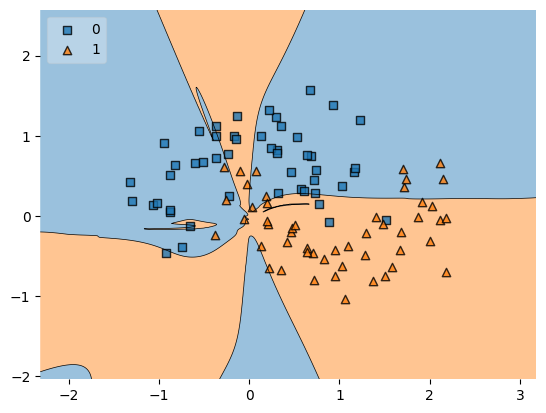

In [50]:
plt.figure()
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)

HE-NORMAL

In [51]:
model=Sequential()

model.add(Dense(10,input_dim=2,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.get_weights()

[array([[ 0.5763656 ,  0.23036319, -2.2333465 ,  0.15704322,  0.73204046,
          0.23579353,  0.47659564, -0.7341416 , -1.0494434 , -0.20675409],
        [-0.25189176, -0.10211886, -0.00904863, -0.13878705, -0.3172303 ,
         -0.49586487, -1.2148708 , -0.24647251,  0.20593244,  0.20380193]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.83439565, -0.97433984, -0.0920826 ,  0.22753155, -0.25007254,
          0.2948034 ,  0.67760223, -0.9701456 , -0.03686312, -0.49540654],
        [ 0.24348786,  0.6241052 ,  0.57266164,  0.6912563 ,  0.29723138,
         -0.11913107,  0.46122077, -0.8642858 , -0.10994979,  0.02132881],
        [ 0.39833155,  0.9217009 ,  0.11188576,  0.89849746,  0.83943266,
          0.2071565 ,  0.3918277 , -0.05493837, -0.2250669 ,  0.5685254 ],
        [ 0.2972864 ,  0.19224407, -0.23393342,  0.08008923, -0.47854012,
          0.16763934,  0.7747916 ,  0.69989645, -0.6508767 , -0.05292017],
        [-0.35411

In [52]:
ini_weight=model.get_weights()

In [54]:
ini_weight[0]=np.random.randn(2,10)*np.sqrt(2/2)
ini_weight[1]=np.zeros(model.get_weights()[1].shape)
ini_weight[2]=np.random.randn(10,10)*np.sqrt(2/2)
ini_weight[3]=np.zeros(model.get_weights()[3].shape)
ini_weight[4]=np.random.randn(10,10)*np.sqrt(2/2)
ini_weight[5]=np.zeros(model.get_weights()[5].shape)
ini_weight[6]=np.random.randn(10,10)*np.sqrt(2/2)
ini_weight[7]=np.zeros(model.get_weights()[7].shape)
ini_weight[8]=np.random.randn(10,1)*np.sqrt(2/2)
ini_weight[9]=np.zeros(model.get_weights()[9].shape)

In [55]:
model.set_weights(ini_weight)
model.get_weights()

[array([[ 1.6700808 ,  0.02398252,  0.3037097 ,  0.00736149, -0.5778023 ,
          0.70549214,  0.06672742,  0.56003225,  0.3474012 , -0.15997936],
        [-0.30914894, -0.5552934 , -1.4678625 ,  0.9776605 , -1.1393715 ,
          0.47460824,  0.4514862 ,  1.6008675 , -0.31376013,  1.2353755 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.71785355, -0.51527447,  0.7170237 , -0.37410995, -0.9683156 ,
          2.502246  ,  0.00843898, -1.209363  , -0.3043951 ,  0.28933483],
        [-0.07325009, -0.29590026,  1.1793948 , -0.06021889,  0.16535215,
          1.6507937 ,  0.6123472 ,  0.24933441,  0.27986172, -0.22627686],
        [ 2.0474339 ,  0.12047791,  1.3896363 ,  0.20093201,  0.44885477,
         -0.312105  ,  0.26697508,  0.24058972,  1.2820836 , -0.01211601],
        [-0.2075777 , -1.8672374 , -0.34890294,  0.18410824,  1.3226559 ,
          0.39536098,  0.2032931 ,  0.2131446 , -0.387222  ,  1.3651961 ],
        [ 0.40589

In [56]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 692ms/step - accuracy: 0.5227 - loss: 12.4298 - val_accuracy: 0.5000 - val_loss: 13.1975
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5149 - loss: 11.2473 - val_accuracy: 0.5000 - val_loss: 12.6821
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5110 - loss: 12.1468 - val_accuracy: 0.5000 - val_loss: 12.1889
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5149 - loss: 10.1703 - val_accuracy: 0.5000 - val_loss: 11.7144
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5344 - loss: 10.0015 - val_accuracy: 0.5000 - val_loss: 11.2530
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5071 - loss: 10.5816 - val_accuracy: 0.5000 - val_loss: 10.8039
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4797 - loss: 10.2666 - val_accuracy: 0.5000 - val_loss: 10.3841
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4914 - loss: 9.2584 - val_accuracy: 0.5

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


<Axes: >

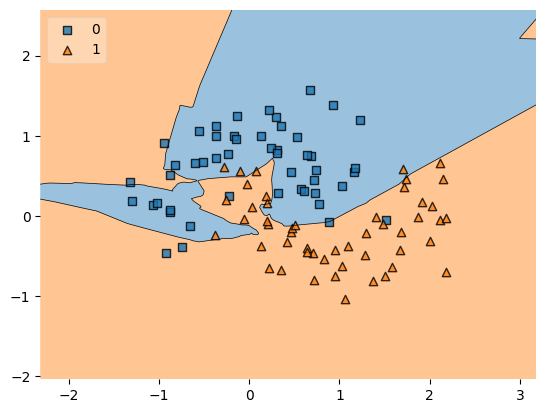

In [58]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)

HE-UNIFORM

In [59]:
model=Sequential()

model.add(Dense(10,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.get_weights()

[array([[-0.30718052, -0.486045  , -0.6294602 ,  0.15383124, -0.69301295,
          1.6891049 , -1.4282585 ,  0.7070955 , -1.2376919 , -0.9818959 ],
        [-1.1195414 ,  1.4337553 ,  0.6921941 , -1.7093751 , -1.2233057 ,
         -0.9452723 , -0.6084653 ,  1.6781877 ,  1.0376285 ,  0.56902826]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.33075583,  0.40833926, -0.6977264 , -0.690087  , -0.22594678,
         -0.37293166, -0.5409135 ,  0.6975491 , -0.6202151 , -0.37453616],
        [ 0.19360596,  0.61097586,  0.44420707, -0.06755787,  0.3311453 ,
         -0.39297128,  0.46005213,  0.33169305, -0.4077736 , -0.45257583],
        [ 0.43605113,  0.1486215 , -0.17950708,  0.38289714,  0.5537306 ,
         -0.5380394 , -0.49109307,  0.6716218 ,  0.49100327, -0.537977  ],
        [-0.03836763, -0.4912541 , -0.43311647, -0.22978997, -0.01496243,
          0.0685361 , -0.3313619 , -0.5636779 ,  0.5391085 , -0.1896987 ],
        [-0.02519

In [61]:
ini_weights=model.get_weights()

In [62]:
ini_weights[0]=np.random.randn(2,10)*np.sqrt(6/2)
ini_weights[1]=np.zeros(model.get_weights()[1].shape)
ini_weights[2]=np.random.randn(10,10)*np.sqrt(6/2)
ini_weights[3]=np.zeros(model.get_weights()[3].shape)
ini_weights[4]=np.random.randn(10,10)*np.sqrt(6/2)
ini_weights[5]=np.zeros(model.get_weights()[5].shape)
ini_weights[6]=np.random.randn(10,10)*np.sqrt(6/2)
ini_weights[7]=np.zeros(model.get_weights()[7].shape)
ini_weights[8]=np.random.randn(10,1)*np.sqrt(6/2)
ini_weights[9]=np.zeros(model.get_weights()[9].shape)

In [63]:
model.set_weights(ini_weight)
model.get_weights()

[array([[ 1.6700808 ,  0.02398252,  0.3037097 ,  0.00736149, -0.5778023 ,
          0.70549214,  0.06672742,  0.56003225,  0.3474012 , -0.15997936],
        [-0.30914894, -0.5552934 , -1.4678625 ,  0.9776605 , -1.1393715 ,
          0.47460824,  0.4514862 ,  1.6008675 , -0.31376013,  1.2353755 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.71785355, -0.51527447,  0.7170237 , -0.37410995, -0.9683156 ,
          2.502246  ,  0.00843898, -1.209363  , -0.3043951 ,  0.28933483],
        [-0.07325009, -0.29590026,  1.1793948 , -0.06021889,  0.16535215,
          1.6507937 ,  0.6123472 ,  0.24933441,  0.27986172, -0.22627686],
        [ 2.0474339 ,  0.12047791,  1.3896363 ,  0.20093201,  0.44885477,
         -0.312105  ,  0.26697508,  0.24058972,  1.2820836 , -0.01211601],
        [-0.2075777 , -1.8672374 , -0.34890294,  0.18410824,  1.3226559 ,
          0.39536098,  0.2032931 ,  0.2131446 , -0.387222  ,  1.3651961 ],
        [ 0.40589

In [64]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 467ms/step - accuracy: 0.5227 - loss: 12.6066 - val_accuracy: 0.5000 - val_loss: 13.2025
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5071 - loss: 12.6879 - val_accuracy: 0.5000 - val_loss: 12.7074
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5266 - loss: 10.7159 - val_accuracy: 0.5000 - val_loss: 12.2402
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5149 - loss: 11.4769 - val_accuracy: 0.5000 - val_loss: 11.7779
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5305 - loss: 9.5807 - val_accuracy: 0.5000 - val_loss: 11.3229
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5344 - loss: 9.5538 - val_accuracy: 0.5000 - val_loss: 10.8830
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5110 - loss: 9.4449 - val_accuracy: 0.5000 - val_loss: 10.4546
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4954 - loss: 9.3560 - val_accuracy: 0.5000

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

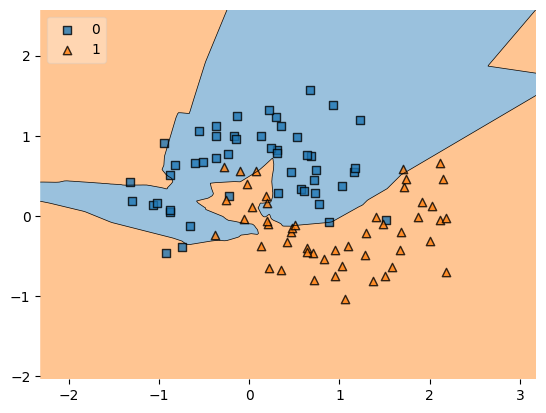

In [65]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)